In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
#training_set -> Dog, Cat
#testing_set -> Dog, Cat

In [ ]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [ ]:
training_set.filenames[1]

'cats\\cat.10.jpg'

In [ ]:
img = tf.keras.preprocessing.image.load_img('training_set\cats\\cat.1.jpg')

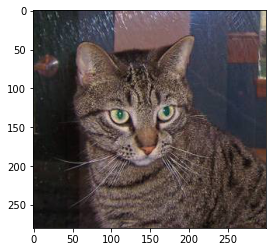

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 22 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 activation='relu', 
                 padding='valid',
                 input_shape=[64, 64, 3]))

In [ ]:
model.add(MaxPool2D(pool_size = 2))

In [ ]:
model.add(Conv2D(filters=32,
                 kernel_size = 3,
                 activation = 'relu'
                 ))

In [ ]:
model.add(MaxPool2D(pool_size = 2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=32, activation = 'relu'))
#model.add(Dense(units=8, activation = 'relu'))

In [ ]:
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)               

In [ ]:
model.fit(training_set, validation_data=test_set, epochs=10)

Epoch 1/10
250/250 [==============================] - 203s 808ms/step - loss: 0.6645 - accuracy: 0.5935 - val_loss: 0.8648 - val_accuracy: 0.5909
Epoch 2/10
250/250 [==============================] - 86s 344ms/step - loss: 0.5997 - accuracy: 0.6815 - val_loss: 0.5942 - val_accuracy: 0.6364
Epoch 3/10
250/250 [==============================] - 85s 338ms/step - loss: 0.5671 - accuracy: 0.7116 - val_loss: 0.5497 - val_accuracy: 0.6818
Epoch 4/10
250/250 [==============================] - 83s 330ms/step - loss: 0.5324 - accuracy: 0.7308 - val_loss: 0.6638 - val_accuracy: 0.6818
Epoch 5/10
250/250 [==============================] - 83s 330ms/step - loss: 0.5161 - accuracy: 0.7479 - val_loss: 0.5535 - val_accuracy: 0.7273
Epoch 6/10
250/250 [==============================] - 93s 372ms/step - loss: 0.4908 - accuracy: 0.7607 - val_loss: 0.6429 - val_accuracy: 0.6364
Epoch 7/10
250/250 [==============================] - 84s 334ms/step - loss: 0.4769 - accuracy: 0.7674 - val_loss: 0.2755 - val_a

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
#test_img = image.load_img('photo-1529778873920-4da4926a72c2.jpg',target_size = (64, 64,3))
#test_img = image.load_img('photo-1529778873920-4da4926a72c2.jpg',target_size = (224, 224,3))
test_img = image.load_img('photo-1529778873920-4da4926a72c2.jpg',target_size = (224, 224,3))

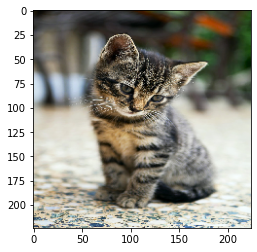

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

NameError: ignored

In [ ]:
result = model.predict(test_img)

In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
result

array([[0.56312776]], dtype=float32)

In [ ]:
if np.round(result[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


# Transfer Learning

In [ ]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
mobile_net.trainable=False

NameError: ignored

In [ ]:
trf_learn = Sequential()

In [ ]:
trf_learn.add(mobile_net)

In [ ]:
trf_learn.add(Flatten())
trf_learn.add(Dense(32, activation = 'relu'))

In [ ]:
trf_learn.add(Dense(1, activation = 'sigmoid'))

In [ ]:
trf_learn.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
trf_learn.summary()

In [ ]:
trf_learn.fit(training_set, validation_data = test_set, epochs = 3)

In [ ]:
test_img = image.load_img('5484d9d1eab8ea3017b17e29.jpg',target_size = (224, 224,3))

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [ ]:
result = trf_learn.predict(test_img)

In [ ]:
result

In [ ]:
if np.round(result[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

In [ ]:
trf_learn.summary()

In [ ]:
trf_learn.predict(test_set)